## 2-D advection

Using the FTBS or upwind scheme

ik = i * ny + k

The differences from diffusion: we use the courant instead of von neumann coefficient, which is defined as cx = dt * ux / dx and cy = dt * uy / dy where u is the velocity broken into the x and y component.


Boundary nodes are only at the upstream edges, and the A matrix only examines i-1 and k-1 nodes. The coefficents are: i,k = 1-cx-cy; i-1,k = cx; i,k-1 = cy

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

AttributeError: 'int' object has no attribute 'ndim'

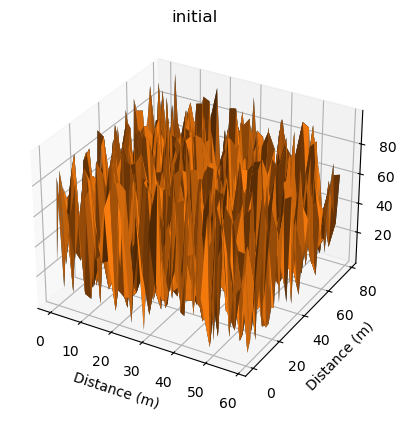

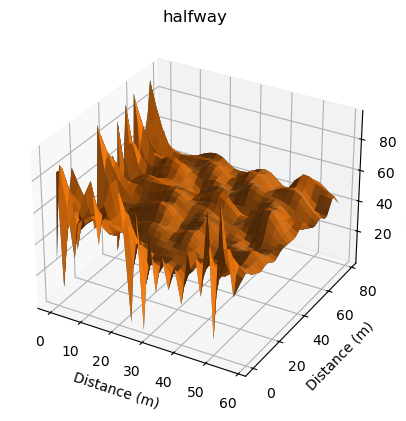

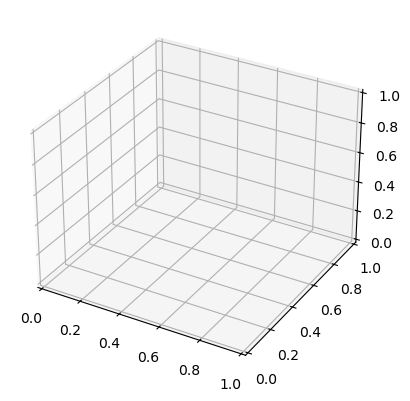

In [8]:
### INITIAL CONDITIONS
nx = 30
ny = 40

dx = 2 # meters
dy = 2 # meters

x = np.arange(0, nx*dx, dx) # creates the 1-D array of x positions
y = np.arange(0, ny*dy, dy) # creates the 1-D array of y positions
X, Y = np.meshgrid(x, y, indexing = 'ij') # creates a 2-D coordinate system for plotting

"""
capital letters = 2D array
lowercase = 1D array
"""

u = 0.02 # m2/year

dt = 5 #years

# example will use topography
Z = np.random.random((nx, ny))*100
z = Z.flatten() # gives the 1-D flattened array, flattened by rows


### STABILITY CHECK
cx = dt * u / dx
cy = dt * u / dy

import sys
if cx > 1:
    print('x is unstable')
    sys.exit()
elif cy > 1:
    print('y is unstable')
    sys.exit()

### CREATING THE A MATRIX

A = np.zeros((nx*ny, nx*ny))

for i in range(nx):
    for k in range(ny):
        ik = i*ny + k
        ## ---- BOUNDARY CONDITIONS ---- ##
        if i == 0:
            A[ik, ik] = 1 # no change
        elif k == 0:
            A[ik, ik] = 1
        else:
            ## ---- MATRIX COEFFICIENT --- ###
            A[ik, ik] = 1 - cx - cy
            A[ik, (i-1)*ny + k] = cx
            A[ik, i*ny + k - 1] = cy

#print(A)

### PLOTTING INITIAL CONDITIONS
# method 1 - use a surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, Z)
ax.plot_surface(X, Y, Z)
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Distance (m)')
ax.set_zlabel('Elevation (m)')
ax.set_title('initial')


### RUNNING TIME
totaltime = 500
time = 0
while time <= totaltime:
    newz = np.dot(A, z)
    z[:] = newz
    
    if time == 250:
        Z = z.reshape(X.shape)
        fig = plt.figure()
        ax = fig.add_subplot(111, projection = '3d')
        ax.plot_surface(X, Y, Z)
        ax.plot_surface(X, Y, Z)
        ax.set_xlabel('Distance (m)')
        ax.set_ylabel('Distance (m)')
        ax.set_zlabel('Elevation (m)')
        ax.set_title('halfway')
    time += dt
    
#### PLOT THE FINAL TOPOGRAPHY
Z = z.reshape(X.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, Z)
ax.plot_surface(X, Y, Z)
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Distance (m)')
ax.set_zlabel('Elevation (m)')
ax.set_title('final')

# method 2 - uses pcolormesh
fig2, ax2 = plt.subplots(1,1)
finalz = ax2.pcolormesh(X, Y, Z)
ax2.set_title('Final conditions')
fig2.colorbar(finalz, label = 'Elevation (m)')


[[ 2.64679685 18.30498395 79.74031579 ... 99.30661329 29.64625844
  94.75596233]
 [84.22798237 92.49988657  8.75862115 ... 36.17160113 41.93337833
   7.08649506]
 [43.87505135 78.62381348 93.08277211 ... 29.28479861 97.87957764
  91.07256367]
 ...
 [17.23369292 29.74829106 93.17921147 ... 23.02818942 22.19548495
  24.94359044]
 [32.85156989 72.54915192 59.60099898 ... 88.25807441 88.34254593
  10.94629481]
 [37.42170476 46.98528047 29.94741473 ... 34.76706416 43.03472447
  88.75152403]]


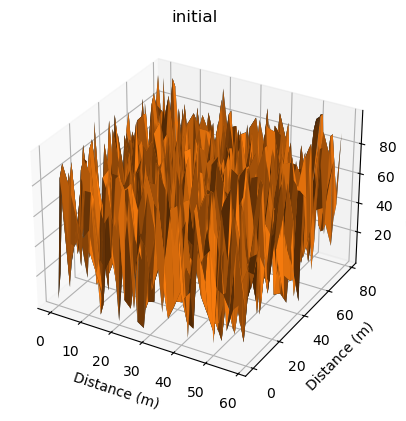

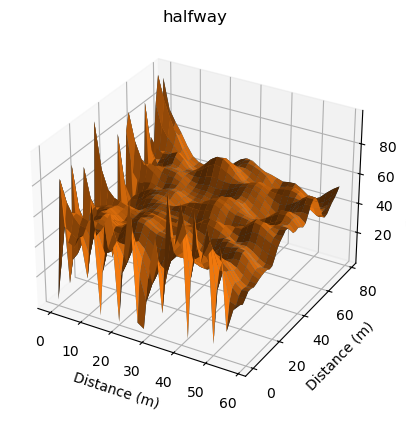

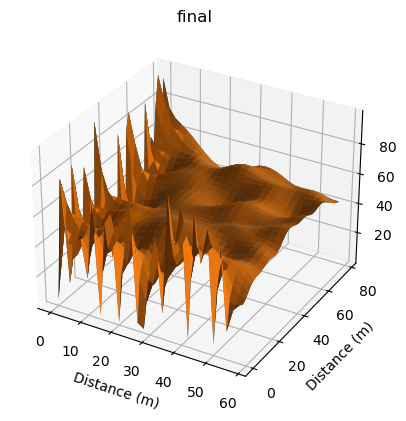

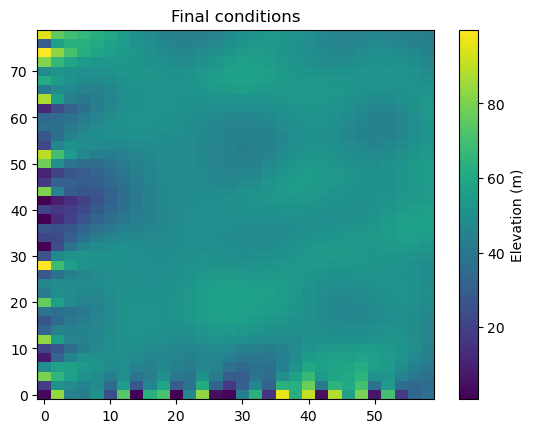

In [12]:
### INITIAL CONDITIONS
nx = 30
ny = 40

dx = 2 # meters
dy = 2 # meters

x = np.arange(0, nx*dx, dx) # creates the 1-D array of x positions
y = np.arange(0, ny*dy, dy) # creates the 1-D array of y positions
X, Y = np.meshgrid(x, y, indexing = 'ij') # creates a 2-D coordinate system for plotting

"""
capital letters = 2D array
lowercase = 1D array
"""

u = 0.02 # m2/year

dt = 5 #years

# example will use topography
Z = np.random.random((nx, ny))*100
z = Z.flatten() # gives the 1-D flattened array, flattened by rows
print(Z)


### STABILITY CHECK
cx = dt * u / dx
cy = dt * u / dy

import sys
if cx > 1:
    print('x is unstable')
    sys.exit()
elif cy > 1:
    print('y is unstable')
    sys.exit()

### CREATING THE A MATRIX

A = np.zeros((nx*ny, nx*ny))

for i in range(nx):
    for k in range(ny):
        ik = i*ny + k
        ## ---- BOUNDARY CONDITIONS ---- ##
        if i == 0:
            A[ik, ik] = 1 # no change
        elif k == 0:
            A[ik, ik] = 1
        else:
            ## ---- MATRIX COEFFICIENT --- ###
            A[ik, ik] = 1 - cx - cy
            A[ik, (i-1)*ny + k] = cx
            A[ik, i*ny + k - 1] = cy

#print(A)

### PLOTTING INITIAL CONDITIONS
# method 1 - use a surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, Z)
ax.plot_surface(X, Y, Z)
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Distance (m)')
ax.set_zlabel('Elevation (m)')
ax.set_title('initial')


### RUNNING TIME
totaltime = 500
time = 0
while time <= totaltime:
    newz = np.dot(A, z)
    z[:] = newz
    
    if time == 250:
        Z = z.reshape(X.shape)
        fig = plt.figure()
        ax = fig.add_subplot(111, projection = '3d')
        ax.plot_surface(X, Y, Z)
        ax.plot_surface(X, Y, Z)
        ax.set_xlabel('Distance (m)')
        ax.set_ylabel('Distance (m)')
        ax.set_zlabel('Elevation (m)')
        ax.set_title('halfway')
    time += dt
    
#### PLOT THE FINAL TOPOGRAPHY
Z = z.reshape(X.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, Z)
ax.plot_surface(X, Y, Z)
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Distance (m)')
ax.set_zlabel('Elevation (m)')
ax.set_title('final')

# method 2 - uses pcolormesh
fig2, ax2 = plt.subplots(1,1)
finalz = ax2.pcolormesh(X, Y, Z)
ax2.set_title('Final conditions')
fig2.colorbar(finalz, label = 'Elevation (m)')
